In [3]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import pickle
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
TESS = "/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/"
# Run one example 
dir_list = os.listdir(TESS)
dir_list[0:15]

['YAF_fear',
 'YAF_neutral',
 'YAF_angry',
 'OAF_Sad',
 'OAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_disgust',
 'YAF_happy',
 'YAF_sad',
 'OAF_Pleasant_surprise',
 'OAF_Fear',
 'OAF_disgust',
 'OAF_angry',
 'OAF_happy']

In [25]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('Female_Angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('Female_Disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('Female_Fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('Female_Happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('Female_Neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('Female_Surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('Female_Sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)
        TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

Female_Happy       400
Female_Sad         400
Female_Disgust     400
Female_Angry       400
Female_Neutral     400
Female_Fear        400
Female_Surprise    400
Name: labels, dtype: int64

In [19]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('Angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('Disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('Fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('Happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('Neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('Surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('Sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)
        TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

Fear        400
Neutral     400
Sad         400
Disgust     400
Surprise    400
Happy       400
Angry       400
Name: labels, dtype: int64

In [26]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'Anger', 2:'Disgust', 3:'Fear', 4:'Happy', 5:'Neutral', 6:'Sad', 7:'Surprise'})
audio_df.columns = ['emotion']
audio_df = pd.concat([audio_df,pd.DataFrame(path, columns = ['path'])],axis=1)
audio_df

,emotion,path
0,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav
1,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav
2,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav
3,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav
4,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_wire_fear.wav
...,...,...
2795,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_happy/OAF_walk_happy.wav
2796,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_happy/OAF_vote_happy.wav
2797,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_happy/OAF_turn_happy.wav
2798,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_happy/OAF_wag_happy.wav


In [27]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
audio_df.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,emotion,path
1355,Female_Disgust,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_disgust/YAF_such_disgust.wav
1588,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_happy/YAF_wash_happy.wav
194,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_name_fear.wav
2503,Female_Angry,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_numb_angry.wav
2762,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_happy/OAF_judge_happy.wav
...,...,...
1270,Female_Disgust,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_disgust/YAF_tell_disgust.wav
860,Female_Neutral,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_neutral/OAF_haze_neutral.wav
1316,Female_Disgust,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_disgust/YAF_phone_disgust.wav
1,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav


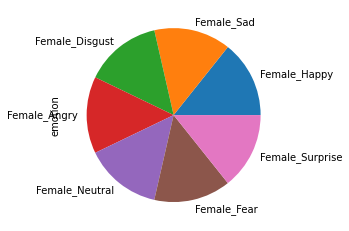

In [9]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='pie') 

In [10]:
df = pd.concat([TESS_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

Female_Happy       400
Female_Sad         400
Female_Disgust     400
Female_Angry       400
Female_Neutral     400
Female_Fear        400
Female_Surprise    400
Name: labels, dtype: int64


In [11]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("./Data_path.csv")
ref.head(3)

,labels,source,path
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav


In [12]:
data_path = pd.concat([audio_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,emotion,path
0,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav
1,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav
2,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav
3,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav
4,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_wire_fear.wav


In [13]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['mfcc'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=1.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

KeyboardInterrupt: ignored

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['mfcc'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav,-21.101780,-20.970684,-23.216520,-18.444691,-18.200020,-22.025625,-25.088661,-28.169729,-26.954769,-26.580538,-26.912210,-26.144051,-23.049955,-22.279377,-24.656532,-26.653727,-24.920637,-24.119112,-23.623779,-23.173706,-24.300772,-24.860945,-21.272940,-19.972532,-21.836977,-24.147800,-24.800251,-25.291494,-25.059292,-27.640369,-26.409445,-25.174263,-26.157377,-26.114208,-28.644863,-26.824862,-25.098864,...,-23.733276,-23.775759,-24.070036,-24.923948,-26.175852,-26.588032,-24.204571,-23.892321,-26.848848,-26.802795,-26.865288,-26.559422,-27.010166,-28.329149,-28.969023,-29.488756,-28.192595,-26.456940,-27.00708,-25.601530,-22.602255,-20.457333,-15.627594,-14.852991,-17.820250,-19.786669,-20.061472,-18.976686,-19.195024,-23.514835,-25.070284,-24.429176,-22.523539,-25.158236,-27.300081,NaN,NaN,NaN,NaN,NaN
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav,-10.550032,-14.714083,-22.295040,-22.898052,-21.560883,-17.394014,-18.550844,-19.787642,-20.568031,-24.176323,-26.276340,-25.674696,-26.643501,-27.360289,-27.152407,-24.437054,-19.736574,-12.076921,-9.205000,-9.602368,-12.938654,-15.369967,-18.389578,-19.857439,-23.175600,-25.886732,-26.137880,-23.709179,-25.749479,-27.488192,-28.465328,-28.547062,-26.115093,-25.952248,-25.551729,-20.625244,-21.362871,...,-21.395596,-16.915264,-14.456832,-15.701985,-16.946093,-19.545212,-15.659415,-14.082031,-13.647314,-13.531877,-14.121389,-18.079670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav,-8.977513,-12.652449,-21.676195,-20.939444,-20.532085,-21.706612,-24.066694,-20.822502,-18.255186,-22.020052,-25.516399,-27.486042,-27.977421,-27.661865,-24.937782,-23.988773,-25.894987,-25.467731,-24.976900,-25.109394,-26.157524,-26.563673,-22.637821,-17.252550,-16.411369,-19.342285,-22.984035,-24.399973,-24.508158,-24.142933,-22.410997,-22.284515,-23.648994,-24.504784,-24.268917,-25.893137,-23.622700,...,-29.441433,-29.557625,-28.866953,-28.276009,-27.002232,-27.397205,-29.922447,-28.709724,-28.853050,-27.815388,-30.019350,-26.973021,-27.413084,-28.218731,-26.916920,-28.652245,-29.975374,-26.737894,-27.72897,-31.964245,-31.466047,-33.565151,-30.969786,-30.516340,-33.119144,-34.974289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav,-7.432144,-8.827226,-6.138981,-2.156117,2.171498,2.929305,2.500369,-0.216118,-6.056233,-8.202143,-9.228257,-13.110254,-19.992378,-22.610033,-24.249393,-24.600859,-25.378544,-26.229074,-26.796202,-26.207674,-21.367107,-22.121286,-20.938225,-20.227478,-19.710217,-16.341957,-14.941712,-13.910646,-14.014164,-15.495463,-17.020506,-14.966228,-14.880589,-15.923120,-13.793132,-14.958277,-15.482838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_wire_fear.wav,-15.911587,-16.001686,-18.790318,-21.671843,-25.780151,-26.750566,-25.216093,-24.597527,-24.283907,-26.177334,-24.584288,-22.462807,-22.992006,-17.180025,-11.859757,-11.978799,-15.985208,-19.689922,-22.266727,-22.377384,-25.

In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(2800, 133)


,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav,-21.101780,-20.970684,-23.216520,-18.444691,-18.200020,-22.025625,-25.088661,-28.169729,-26.954769,-26.580538,-26.912210,-26.144051,-23.049955,-22.279377,-24.656532,-26.653727,-24.920637,-24.119112,-23.623779,-23.173706,-24.300772,-24.860945,-21.272940,-19.972532,-21.836977,-24.147800,-24.800251,-25.291494,-25.059292,-27.640369,-26.409445,-25.174263,-26.157377,-26.114208,-28.644863,-26.824862,-25.098864,...,-23.733276,-23.775759,-24.070036,-24.923948,-26.175852,-26.588032,-24.204571,-23.892321,-26.848848,-26.802795,-26.865288,-26.559422,-27.010166,-28.329149,-28.969023,-29.488756,-28.192595,-26.456940,-27.00708,-25.601530,-22.602255,-20.457333,-15.627594,-14.852991,-17.820250,-19.786669,-20.061472,-18.976686,-19.195024,-23.514835,-25.070284,-24.429176,-22.523539,-25.158236,-27.300081,0.0,0.0,0.0,0.0,0.0
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav,-10.550032,-14.714083,-22.295040,-22.898052,-21.560883,-17.394014,-18.550844,-19.787642,-20.568031,-24.176323,-26.276340,-25.674696,-26.643501,-27.360289,-27.152407,-24.437054,-19.736574,-12.076921,-9.205000,-9.602368,-12.938654,-15.369967,-18.389578,-19.857439,-23.175600,-25.886732,-26.137880,-23.709179,-25.749479,-27.488192,-28.465328,-28.547062,-26.115093,-25.952248,-25.551729,-20.625244,-21.362871,...,-21.395596,-16.915264,-14.456832,-15.701985,-16.946093,-19.545212,-15.659415,-14.082031,-13.647314,-13.531877,-14.121389,-18.079670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav,-8.977513,-12.652449,-21.676195,-20.939444,-20.532085,-21.706612,-24.066694,-20.822502,-18.255186,-22.020052,-25.516399,-27.486042,-27.977421,-27.661865,-24.937782,-23.988773,-25.894987,-25.467731,-24.976900,-25.109394,-26.157524,-26.563673,-22.637821,-17.252550,-16.411369,-19.342285,-22.984035,-24.399973,-24.508158,-24.142933,-22.410997,-22.284515,-23.648994,-24.504784,-24.268917,-25.893137,-23.622700,...,-29.441433,-29.557625,-28.866953,-28.276009,-27.002232,-27.397205,-29.922447,-28.709724,-28.853050,-27.815388,-30.019350,-26.973021,-27.413084,-28.218731,-26.916920,-28.652245,-29.975374,-26.737894,-27.72897,-31.964245,-31.466047,-33.565151,-30.969786,-30.516340,-33.119144,-34.974289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav,-7.432144,-8.827226,-6.138981,-2.156117,2.171498,2.929305,2.500369,-0.216118,-6.056233,-8.202143,-9.228257,-13.110254,-19.992378,-22.610033,-24.249393,-24.600859,-25.378544,-26.229074,-26.796202,-26.207674,-21.367107,-22.121286,-20.938225,-20.227478,-19.710217,-16.341957,-14.941712,-13.910646,-14.014164,-15.495463,-17.020506,-14.966228,-14.880589,-15.923120,-13.793132,-14.958277,-15.482838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,Female_Fear,TESS,/content/drive/My

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
2241,-11.667391,-14.809291,-28.188740,-30.375956,-30.212076,-29.668898,-28.725576,-27.862885,-25.907867,-23.707487,-22.168276,-21.454664,-21.468626,-22.482845,-24.981598,-24.801033,-23.706226,-21.592054,-19.605892,-19.653690,-21.323414,-21.596508,-22.884249,-23.051626,-21.427340,-21.885826,-22.510529,-24.182940,-25.430737,-25.839455,-26.958881,-27.131680,-27.021175,-29.133558,-24.669138,-24.292789,-25.638193,-25.933542,-26.525892,-27.276569,...,-42.531700,-43.296318,-40.769669,-40.380592,-42.567844,-44.850674,-45.940586,-44.716568,-42.768684,-41.154747,-40.212116,-40.892212,-38.768059,-31.022739,-18.978720,-17.374313,-20.336264,-18.394056,-16.715126,-15.400435,-17.213938,-17.446617,-16.484100,-17.735476,-20.254047,-21.695995,-22.377821,-23.068729,-27.034889,-25.533154,-23.848158,-23.397112,-22.126385,-21.683323,-23.819366,-25.082939,-24.086048,-23.877573,-15.683275,-10.350236
25,-9.409563,-11.830161,-15.821761,-17.595097,-16.381865,-19.430660,-21.694540,-23.160124,-24.506123,-25.004265,-25.046019,-28.658405,-31.233370,-28.405800,-25.774750,-24.710167,-20.449867,-18.603456,-19.860348,-20.501186,-20.207802,-22.376699,-25.501921,-26.663025,-28.132702,-26.032623,-27.414564,-28.740843,-26.531404,-25.208178,-26.505440,-25.074364,-24.540903,-27.415945,-25.009632,-24.728407,-25.813112,-25.676104,-24.538465,-21.659046,...,-23.522818,-25.315420,-25.721483,-26.504211,-27.920433,-28.129620,-27.261492,-27.192308,-29.575378,-31.660097,-37.268486,-35.780354,-30.149900,-30.677631,-31.995760,-33.141850,-34.008213,-33.102505,-34.587723,-34.661583,-36.019844,-38.622269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
840,-17.905764,-20.177368,-26.227608,-25.964329,-26.266863,-27.809099,-26.433777,-25.843746,-26.493124,-26.896711,-26.457439,-26.114330,-26.026049,-24.829905,-25.417055,-26.281820,-26.578438,-26.416994,-26.703947,-28.314157,-28.698265,-26.968302,-27.542692,-28.689854,-29.170155,-29.170757,-29.817421,-29.204708,-28.501310,-27.792805,-27.092421,-27.188917,-27.010921,-26.268658,-25.550322,-25.180758,-26.039686,-26.543631,-26.117239,-26.833744,...,-43.001427,-41.426262,-41.019974,-42.581631,-30.504890,-23.810394,-23.433908,-26.143034,-26.716814,-26.930237,-27.121063,-27.880816,-28.341448,-26.607515,-26.654076,-27.090281,-25.415424,-24.519600,-24.654158,-24.692221,-25.461132,-24.391438,-24.473734,-24.303640,-25.048983,-27.118359,-27.589571,-28.268576,-26.916189,-26.120625,-27.341606,-28.731117,-31.793413,-32.542931,-37.254616,-38.196518,-36.083626,-38.274940,-42.283623,-39.291397
2018,-14.006886,-17.786148,-28.173750,-27.850462,-29.133181,-31.476774,-32.215115,-33.503078,-31.755247,-30.316732,-32.345310,-33.587132,-32.739937,-31.251741,-33.609680,-31.995647,-31.848045,-34.066563,-33.121872,-31.772266,-31.867870,-31.769640,-32.556515,-32.986263,-34.455826,-35.415424,-34.393730,-33.026066,-30.398020,-29.457153,-29.547884,-31.433500,-32.797581,-31.163231,-31.164766,-29.680193,-29.779156,-31.054827,-26.496376,-24.961775,...,-24.381365,-29.883677,-37.258400,-40.158115,-44.577129,-39.962765,-35.705933,-37.260502,-36.439926,-36.094887,-41.497036,-41.672905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2582,-30.177004,-29.918806,-30.129160,-30.775633,-31.799873,-32.046406,-31.661366,-32.425945,-32.810390,-33.737709,-33.044380,-32.318443,-32.091354,-31.381050,-30.595476,-29.476948,-29.543623,-30.410328,-32.000694,-33.329849,-34.119312,-34.233948,-33.807495,-34.292488,-34.03

In [ ]:
df

,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav,-21.101780,-20.970684,-23.216520,-18.444691,-18.200020,-22.025625,-25.088661,-28.169729,-26.954769,-26.580538,-26.912210,-26.144051,-23.049955,-22.279377,-24.656532,-26.653727,-24.920637,-24.119112,-23.623779,-23.173706,-24.300772,-24.860945,-21.272940,-19.972532,-21.836977,-24.147800,-24.800251,-25.291494,-25.059292,-27.640369,-26.409445,-25.174263,-26.157377,-26.114208,-28.644863,-26.824862,-25.098864,...,-23.733276,-23.775759,-24.070036,-24.923948,-26.175852,-26.588032,-24.204571,-23.892321,-26.848848,-26.802795,-26.865288,-26.559422,-27.010166,-28.329149,-28.969023,-29.488756,-28.192595,-26.456940,-27.007080,-25.601530,-22.602255,-20.457333,-15.627594,-14.852991,-17.820250,-19.786669,-20.061472,-18.976686,-19.195024,-23.514835,-25.070284,-24.429176,-22.523539,-25.158236,-27.300081,0.000000,0.000000,0.000000,0.000000,0.000000
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav,-10.550032,-14.714083,-22.295040,-22.898052,-21.560883,-17.394014,-18.550844,-19.787642,-20.568031,-24.176323,-26.276340,-25.674696,-26.643501,-27.360289,-27.152407,-24.437054,-19.736574,-12.076921,-9.205000,-9.602368,-12.938654,-15.369967,-18.389578,-19.857439,-23.175600,-25.886732,-26.137880,-23.709179,-25.749479,-27.488192,-28.465328,-28.547062,-26.115093,-25.952248,-25.551729,-20.625244,-21.362871,...,-21.395596,-16.915264,-14.456832,-15.701985,-16.946093,-19.545212,-15.659415,-14.082031,-13.647314,-13.531877,-14.121389,-18.079670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav,-8.977513,-12.652449,-21.676195,-20.939444,-20.532085,-21.706612,-24.066694,-20.822502,-18.255186,-22.020052,-25.516399,-27.486042,-27.977421,-27.661865,-24.937782,-23.988773,-25.894987,-25.467731,-24.976900,-25.109394,-26.157524,-26.563673,-22.637821,-17.252550,-16.411369,-19.342285,-22.984035,-24.399973,-24.508158,-24.142933,-22.410997,-22.284515,-23.648994,-24.504784,-24.268917,-25.893137,-23.622700,...,-29.441433,-29.557625,-28.866953,-28.276009,-27.002232,-27.397205,-29.922447,-28.709724,-28.853050,-27.815388,-30.019350,-26.973021,-27.413084,-28.218731,-26.916920,-28.652245,-29.975374,-26.737894,-27.728970,-31.964245,-31.466047,-33.565151,-30.969786,-30.516340,-33.119144,-34.974289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav,-7.432144,-8.827226,-6.138981,-2.156117,2.171498,2.929305,2.500369,-0.216118,-6.056233,-8.202143,-9.228257,-13.110254,-19.992378,-22.610033,-24.249393,-24.600859,-25.378544,-26.229074,-26.796202,-26.207674,-21.367107,-22.121286,-20.938225,-20.227478,-19.710217,-16.341957,-14.941712,-13.910646,-14.014164,-15.495463,-17.020506,-14.966228,-14.880589,-15.923120,-13.793132,-14.958277,-15.482838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df, test_size=0.20, random_state=0)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
(2240, 130, 1)
(560, 130, 1)


(2800, 7)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
 
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(7, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 773/1000
44/44 [==============================] - 1s 17ms/step - loss: 0.1237 - accuracy: 0.9881 - val_loss: 0.3384 - val_accuracy: 0.9607

Epoch 00773: val_accuracy did not improve from 0.98214
Epoch 774/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.0855 - accuracy: 0.9913 - val_loss: 0.3047 - val_accuracy: 0.9661

Epoch 00774: val_accuracy did not improve from 0.98214
Epoch 775/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.0870 - accuracy: 0.9919 - val_loss: 0.3160 - val_accuracy: 0.9625

Epoch 00775: val_accuracy did not improve from 0.98214
Epoch 776/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.1035 - accuracy: 0.9898 - val_loss: 0.2554 - val_accuracy: 0.9714

Epoch 00776: val_accuracy did not improve from 0.98214
Epoch 777/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.0845 - accuracy: 0.9925 - val_loss: 0.2052 - val_accuracy: 0.9732


18/18 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9768
Loss of the model is -  0.23811762034893036
18/18 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9768
Accuracy of the model is -  97.67857193946838 %


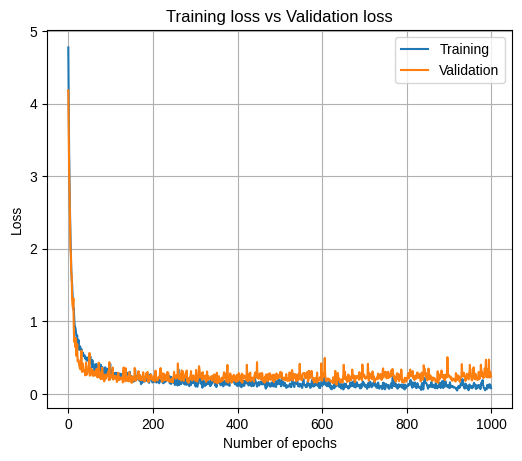

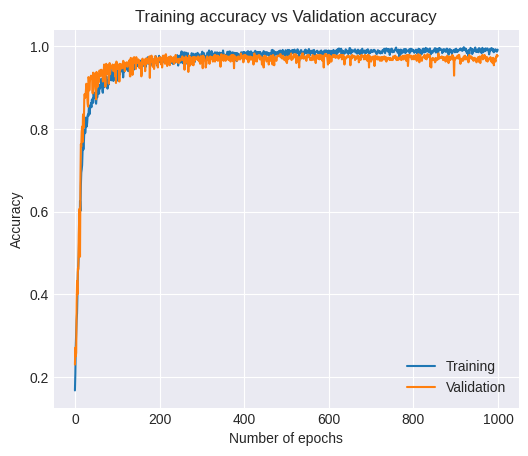

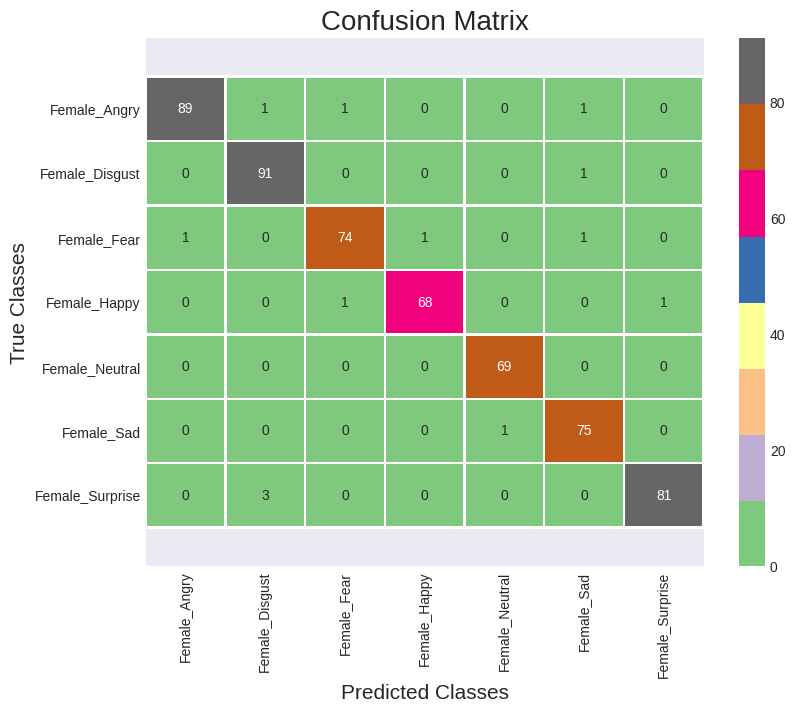

                 precision    recall  f1-score   support

   Female_Angry       0.99      0.97      0.98        92
 Female_Disgust       0.96      0.99      0.97        92
    Female_Fear       0.97      0.96      0.97        77
   Female_Happy       0.99      0.97      0.98        70
 Female_Neutral       0.99      1.00      0.99        69
     Female_Sad       0.96      0.99      0.97        76
Female_Surprise       0.99      0.96      0.98        84

       accuracy                           0.98       560
      macro avg       0.98      0.98      0.98       560
   weighted avg       0.98      0.98      0.98       560



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 100 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 100 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Female_Angry','Female_Disgust','Female_Fear','Female_Happy','Female_Neutral','Female_Sad','Female_Surprise']))  

In [ ]:
#Augmentation

In [28]:
data_path = pd.concat([audio_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,emotion,path
0,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav
1,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav
2,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav
3,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav
4,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_wire_fear.wav


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


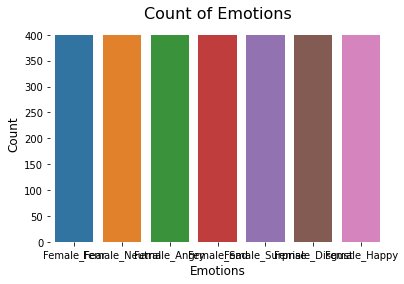

In [29]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12) 
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()  

In [30]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [31]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [33]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
       
    return result

In [34]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [35]:
X, Y = [], []
for path, emotion in zip(audio_df.path, audio_df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [36]:
len(X), len(Y), data_path.path.shape

(8400, 8400, (2800,))

In [37]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,labels
0,0.139764,0.660884,0.447513,0.371310,0.451782,0.528727,0.560643,0.456792,0.394084,0.397168,0.415564,0.480311,0.617290,-319.107727,48.984325,-32.806267,5.515622,-13.394274,11.041607,6.683392,-1.569202,-3.750077,16.238020,-16.819340,0.071916,0.388869,0.041411,0.114388,0.030940,0.017272,0.012563,0.007403,0.004831,0.005151,0.004705,0.004436,0.067443,0.549423,3.705328,6.036161,...,0.081130,0.042753,0.078705,0.115386,0.039775,0.031889,0.020658,0.005615,0.002663,0.002667,0.002358,0.001986,0.001585,0.002889,0.003063,0.004290,0.007363,0.004493,0.005636,0.002701,0.002463,0.001192,0.001064,0.001333,0.002162,0.001344,0.001091,0.001259,0.001021,0.000719,0.000820,0.000753,0.000845,0.000586,0.000615,0.000502,0.000207,0.000047,0.000005,Female_Fear
1,0.153147,0.673269,0.491146,0.429551,0.507123,0.587766,0.593942,0.482487,0.417026,0.418069,0.446829,0.503242,0.620313,-293.658238,33.777675,-24.999413,1.774735,-9.810053,6.400161,6.637325,-4.376769,-0.690000,9.483679,-12.054429,-1.876651,0.982344,0.041468,0.114276,0.031306,0.017426,0.012842,0.007859,0.005175,0.005425,0.005128,0.004730,0.067850,0.550989,3.701317,6.037345,...,0.081849,0.043496,0.078845,0.116070,0.039904,0.031762,0.020591,0.005803,0.002800,0.002771,0.002508,0.002131,0.001721,0.003077,0.003217,0.004467,0.007428,0.004640,0.005630,0.002852,0.002552,0.001277,0.001231,0.001466,0.002255,0.001461,0.001225,0.001382,0.001115,0.000834,0.000964,0.000889,0.000993,0.000732,0.000739,0.000635,0.000343,0.000175,0.000138,Female_Fear
2,0.147414,0.623746,0.667347,0.458635,0.379153,0.456129,0.538509,0.571113,0.469032,0.401671,0.430130,0.429734,0.503718,-374.984985,42.685913,-38.985664,1.003759,-12.572772,10.983674,5.089917,-4.326558,-1.449885,11.141449,-18.959408,4.699156,0.040999,0.020374,0.015041,0.006019,0.004767,0.004649,0.002380,0.001401,0.001620,0.002198,0.002560,0.007986,0.079927,0.772709,1.844719,...,0.010397,0.016723,0.007745,0.008468,0.021113,0.017939,0.009597,0.006986,0.002363,0.001019,0.000492,0.000596,0.000593,0.000379,0.000493,0.000963,0.000751,0.001687,0.001569,0.001280,0.000805,0.000512,0.000378,0.000262,0.000272,0.000462,0.000319,0.000422,0.000258,0.000340,0.000278,0.000134,0.000186,0.000198,0.000156,0.000146,0.000086,0.000023,0.000003,Female_Fear
3,0.071528,0.435721,0.364141,0.387685,0.444990,0.426737,0.565365,0.544388,0.370156,0.295307,0.330430,0.377770,0.381857,-323.503815,61.972919,-13.392282,18.218660,-5.316209,4.874397,-0.780945,-12.480497,-14.134869,8.584168,-16.279877,1.320563,-2.783228,0.045639,0.682250,0.300768,0.087073,0.061640,0.031548,0.026194,0.033070,0.046102,0.094003,1.225083,2.757527,6.968090,6.913035,...,0.020904,0.026132,0.011687,0.013405,0.012169,0.002523,0.001080,0.000598,0.000669,0.000709,0.001917,0.002488,0.002154,0.004249,0.001392,0.000705,0.000747,0.001132,0.001204,0.001422,0.000898,0.000579,0.001082,0.000972,0.001595,0.001482,0.000972,0.001835,0.000662,0.000399,0.000374,0.000651,0.002023,0.002268,0.002214,0.000324,0.000072,0.000023,0.000012,Female_Fear
4,0.096856,0.418069,0.471190,0.403358,0.490960,0.488391,0.517531,0.628776,0.514556,0.371074,0.330056,0.373824,0.383272,-256.807066,33.721015,-1.288960,7.508955,0.902395,-0.015428,-1.009899,-10.766014,-6.695673,-0.274206,-7.548634,-3.782288,-2.909430,0.045943,0.682555,0.302745,0.089317,0.063266,0.033248,0.027265,0.031957,0.046639,0.092802,1.221577,2.756972,6.988444,6.905800,...,0.022424,0.027349,0.012461,0.014906,0.013196,0.003758,0.002404,0.002022,0.002005,0.002105,0.003069,0.003858,0.003683,0.005499,0.002896,0.002083,0.002131,0.002577,0.002534,0.002531,0.002462,0.001932,0.002350,0.002336,0.003104,0.002749,0.002329,0.003067,0.001938,0.001795,0.001640,0.002015,0.003339,0.003144,0.003439,0.001659,0.001413,0.001406,0.001446,Female_Fear


In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
(6720, 155, 1)
(1680, 155, 1)


(8400, 7)

In [39]:
lb.classes_

array(['Female_Angry', 'Female_Disgust', 'Female_Fear', 'Female_Happy',
       'Female_Neutral', 'Female_Sad', 'Female_Surprise'], dtype=object)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(5),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train, y_train,batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 155, 256)          2304      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 256)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 256)           1024      
_________________________________________________________________
dropout (Dropout)            (None, 74, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 37, 256)           0

53/53 [==============================] - 1s 10ms/step - loss: 0.1308 - accuracy: 0.9917
Loss of the model is -  0.130824014544487
53/53 [==============================] - 1s 10ms/step - loss: 0.1308 - accuracy: 0.9917
Accuracy of the model is -  99.16666746139526 %


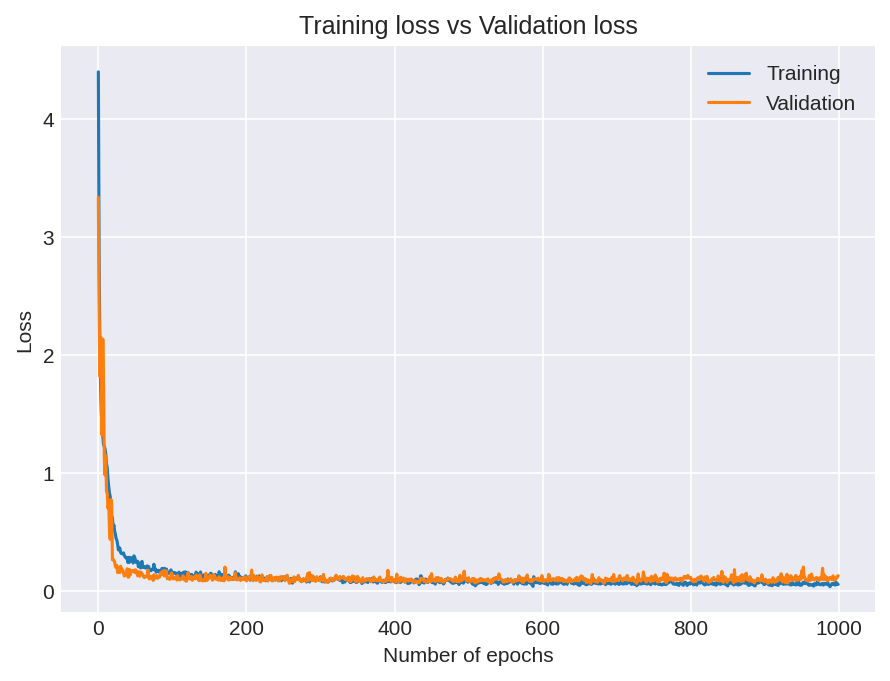

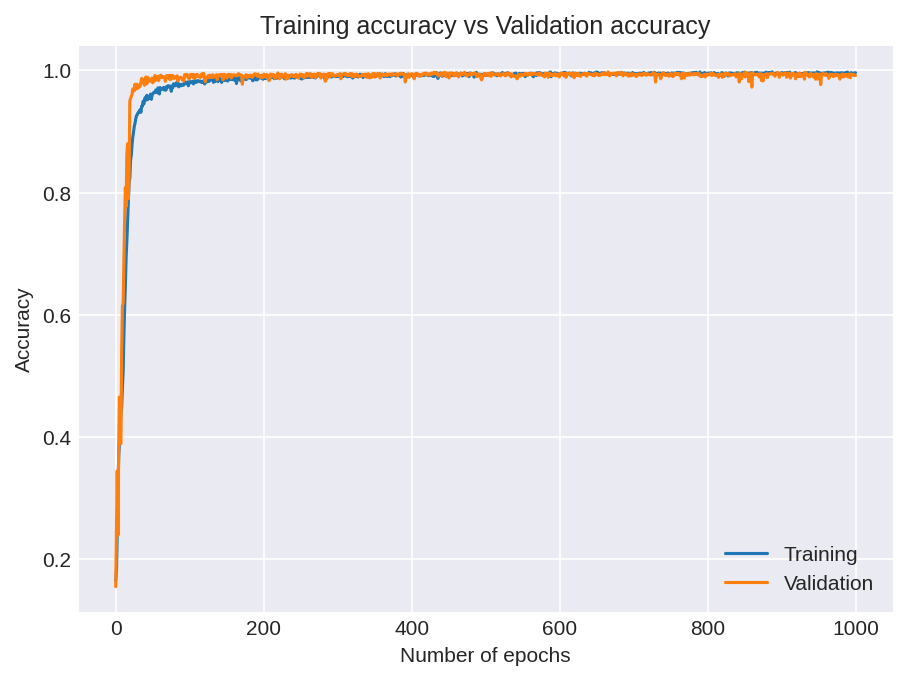

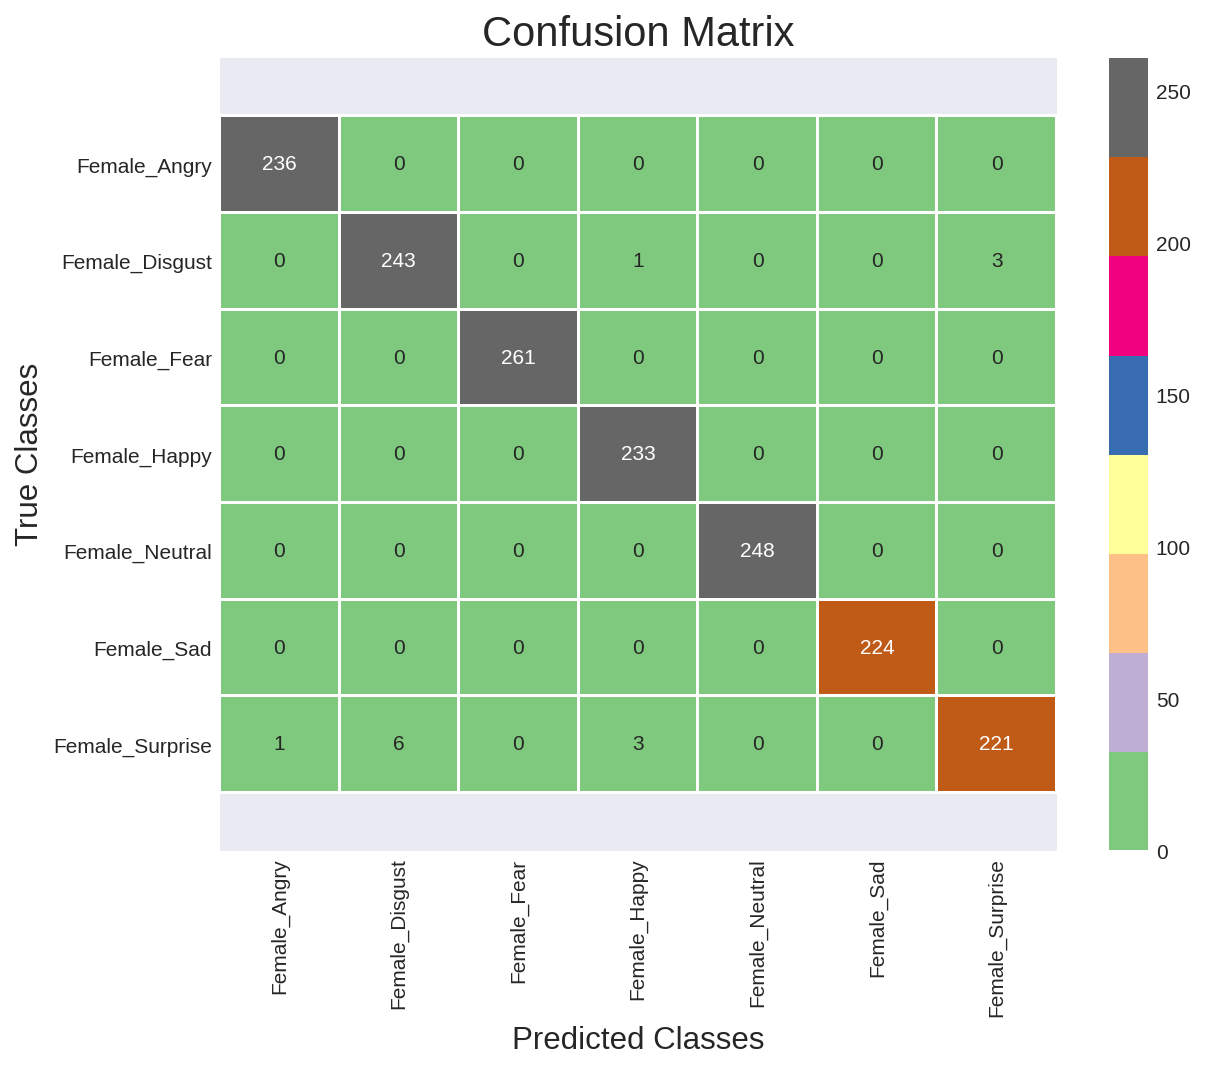

                 precision    recall  f1-score   support

   Female_Angry       1.00      1.00      1.00       236
 Female_Disgust       0.98      0.98      0.98       247
    Female_Fear       1.00      1.00      1.00       261
   Female_Happy       0.98      1.00      0.99       233
 Female_Neutral       1.00      1.00      1.00       248
     Female_Sad       1.00      1.00      1.00       224
Female_Surprise       0.99      0.96      0.97       231

       accuracy                           0.99      1680
      macro avg       0.99      0.99      0.99      1680
   weighted avg       0.99      0.99      0.99      1680



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Female_Angry','Female_Disgust','Female_Fear','Female_Happy','Female_Neutral','Female_Sad','Female_Surprise']))  

In [40]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(5),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.LSTM(512))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train, y_train,batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 155, 256)          2304      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 256)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 256)           1024      
_________________________________________________________________
dropout (Dropout)            (None, 74, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 37, 256)           0

53/53 [==============================] - 0s 6ms/step - loss: 0.1462 - accuracy: 0.9869
Loss of the model is -  0.14618685841560364
53/53 [==============================] - 0s 5ms/step - loss: 0.1462 - accuracy: 0.9869
Accuracy of the model is -  98.69047403335571 %


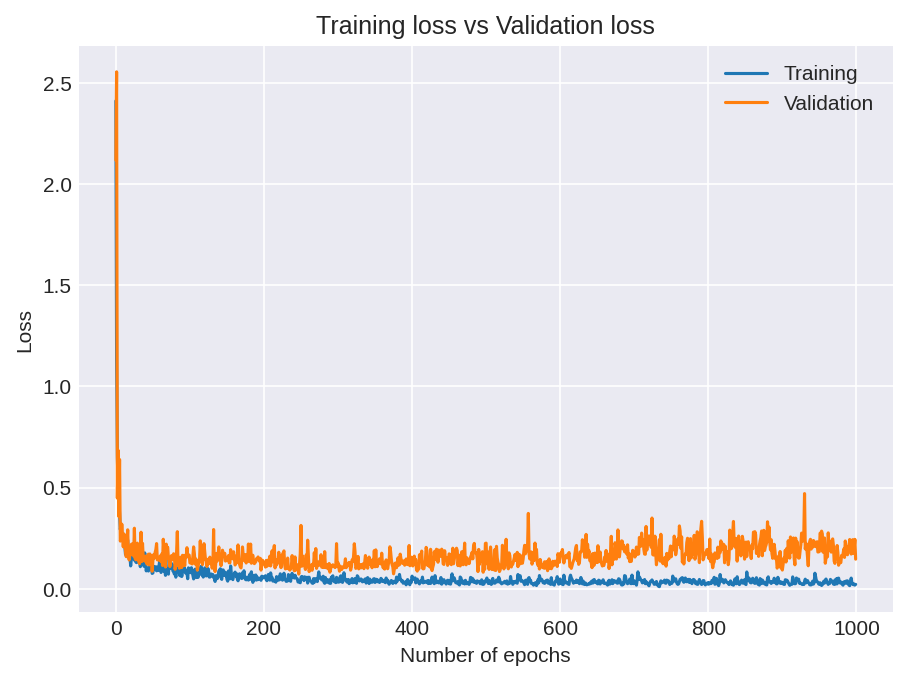

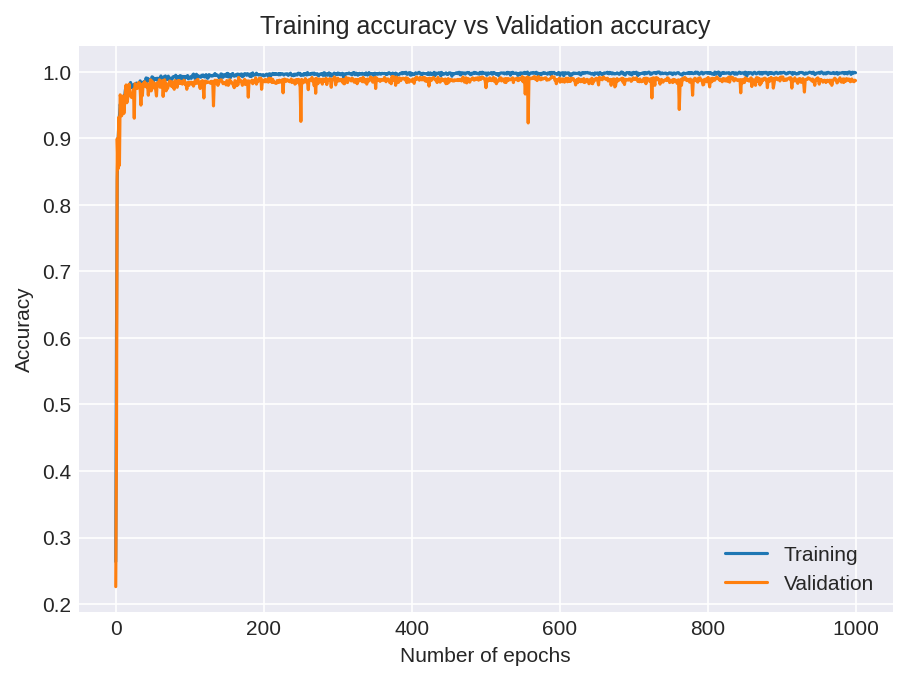

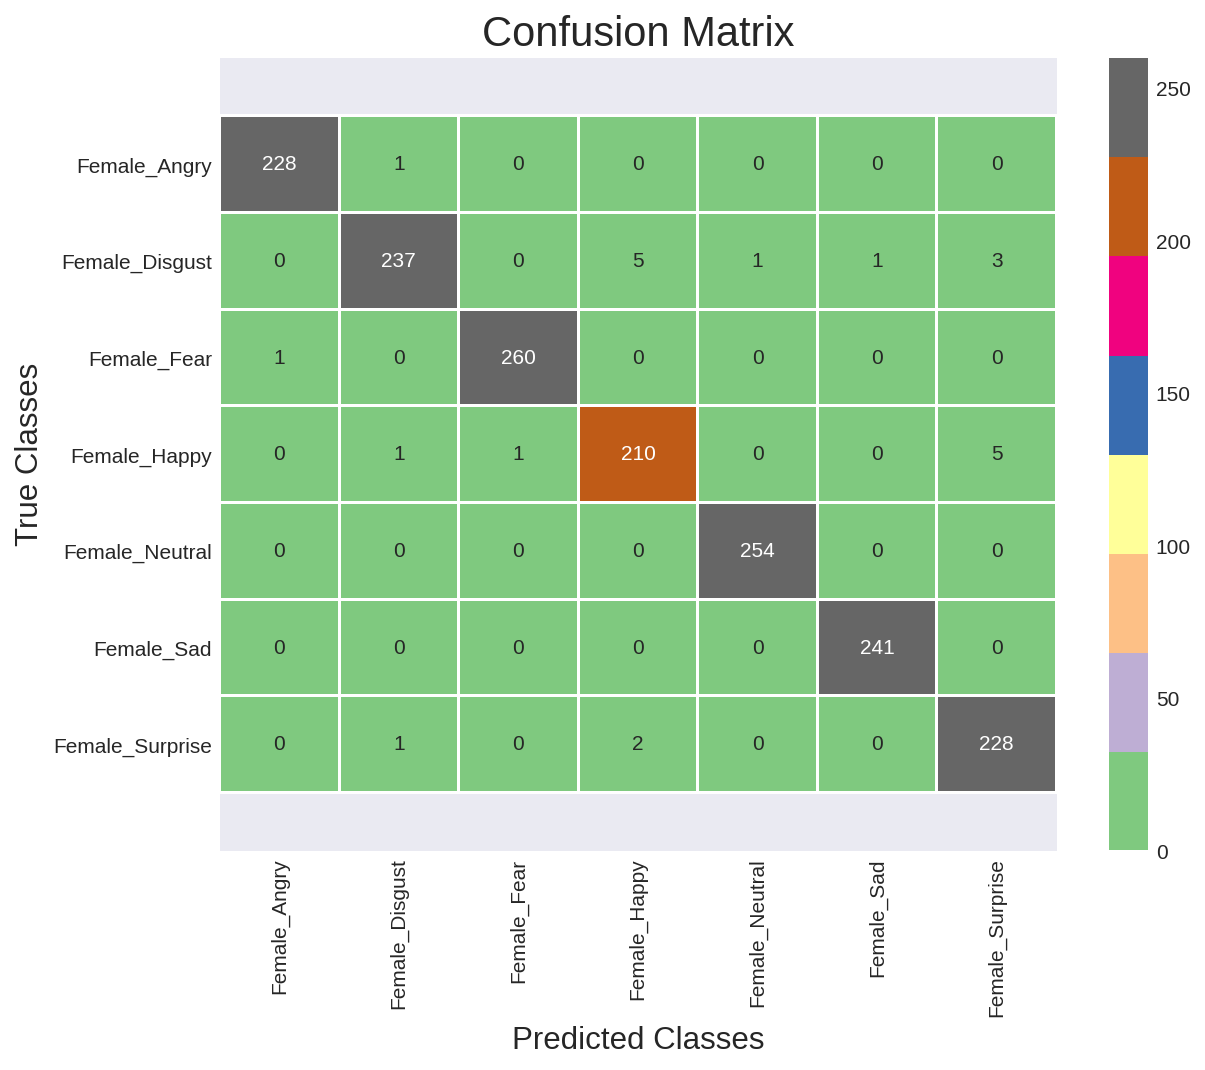

                 precision    recall  f1-score   support

   Female_Angry       1.00      1.00      1.00       229
 Female_Disgust       0.99      0.96      0.97       247
    Female_Fear       1.00      1.00      1.00       261
   Female_Happy       0.97      0.97      0.97       217
 Female_Neutral       1.00      1.00      1.00       254
     Female_Sad       1.00      1.00      1.00       241
Female_Surprise       0.97      0.99      0.98       231

       accuracy                           0.99      1680
      macro avg       0.99      0.99      0.99      1680
   weighted avg       0.99      0.99      0.99      1680



In [42]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Female_Angry','Female_Disgust','Female_Fear','Female_Happy','Female_Neutral','Female_Sad','Female_Surprise']))  